<a href="https://colab.research.google.com/github/vhrique/ELF/blob/main/Analise_outros_ppg_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.decomposition import PCA, KernelPCA
from sklearn.pipeline import Pipeline
from pandas.plotting import parallel_coordinates

In [ ]:
programas = {
    'ppgeps 5': 'https://drive.google.com/uc?export=download&id=1S1HkexqflvXI7OmoKZaiyTRMu-TOWgvZ',
    'ufscar 5': 'https://drive.google.com/uc?export=download&id=10dmR1t_Ag_bMT1cpxYdRyPtnTPMWSo_U',
    'unesp 5': 'https://drive.google.com/uc?export=download&id=1WKQ6It20Y50QnsQRUJEA7oVG8dOi-C6t',
    'unifei 5': 'https://drive.google.com/uc?export=download&id=1WLvc4wt8RsiN2Ob6UWjGq9SodFvQORCj',
    'utfpr 5': 'https://drive.google.com/uc?export=download&id=1WQy029rK5G7CDKWOQNvTv1tBUQxEW7Uh',
    'usp 5': 'https://drive.google.com/uc?export=download&id=1WON__P3iUku7aVeqn2226JOuI1dsauai',
    'ufsc 6': 'https://drive.google.com/uc?export=download&id=1V_EkUySNy1cZbUrMxnXdXYJ0AwZf1rQp',
    'ufpe 7': 'https://drive.google.com/uc?export=download&id=1V_nEEQAZi1jggBY_GQOVo08lGHWBpn9Z',
    'pucrio 7': 'https://drive.google.com/uc?export=download&id=1WFXYh2PvbnwqeBckFAn6Q3QeYEUBPOyY',
    'ufrgs 7': 'https://drive.google.com/uc?export=download&id=10dmR1t_Ag_bMT1cpxYdRyPtnTPMWSo_U',
}

In [ ]:
X_ppg = []
y_ppg = []
periodo = '2021 - 2024'
for item in programas:
    df = pd.read_excel(programas[item], header=12, nrows=473)
    df = df.query('INDICADOR != "Variação percentual"')
    if 'ppgeps' in item:
        X_ppg.extend([df[f'{periodo}'].tolist()])
    else:
        X_ppg.extend([df[f'{periodo}.1'].tolist()])
    y_ppg.extend([int(item[-1])])
X_ppg = np.array(X_ppg)
y_ppg = np.array(y_ppg)

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default sty

In [ ]:
features = df.INDICADOR.tolist()
for i in range(len(features)):
    feature = features[i]
    if feature not in ['Indicador considerando apenas discentes', 'Indicador considerando apenas egressos registrados na Sucupira', 'Indicador considerando apenas egressos identificados pelo sistema']:
        main_feature = feature
    else:
        features[i] = main_feature + ': ' + feature

# Análise Inicial - Lasso e Ridge

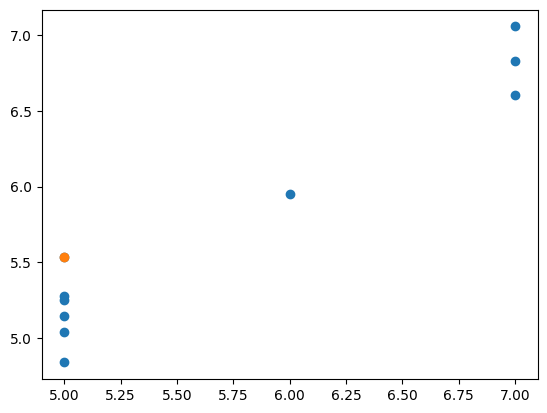

,Percentual de docentes permanentes (DP) com artigo A2+ (A1 e A2) com discentes ou egressos: Indicador considerando apenas discentes,Percentual de docentes permanentes (DP) com produção com discentes ou egressos: Indicador considerando apenas egressos identificados pelo sistema
ppgeps 5,66.200466,0.000000
ufscar 5,46.031746,2.976190
unesp 5,38.636364,1.515152
unifei 5,44.029304,2.564103
utfpr 5,61.403509,5.263158
usp 5,46.691176,8.333333
ufsc 6,49.206349,3.333333
ufpe 7,69.117647,47.058824
pucrio 7,61.437908,4.183007
ufrgs 7,69.362745,6.004902


In [ ]:
mdl = Lasso().fit(X_ppg[1:], y_ppg[1:])
y_ppg_pred = mdl.predict(X_ppg)

plt.scatter(y_ppg, y_ppg_pred)
plt.scatter(y_ppg[0], y_ppg_pred[0])
plt.show()

positive_lasso_features = np.array(features)[mdl.coef_ > 0.0]
negative_lasso_features = np.array(features)[mdl.coef_ < 0.0]
positive_lasso_features, negative_lasso_features

df = pd.DataFrame(
    X_ppg[:,mdl.coef_ > 0.0],
    columns=positive_lasso_features,
    index=[item for item in programas])
df

In [ ]:
df = pd.DataFrame(
    X_ppg[:,mdl.coef_ < 0.0],
    columns=negative_lasso_features,
    index=[item for item in programas])
df

,Percentual de docentes permanentes (DP) com trabalho publicado em anais de eventos com discentes ou egressos: Indicador considerando apenas egressos registrados na Sucupira,% DP com orientações de doutorado em andamento,Média de carga horária dos DPs em turmas ministradas,Média de carga horária de outros docentes em turmas ministradas
ppgeps 5,59.673660,86.713287,59.199301,75.000000
ufscar 5,42.261905,91.269841,176.974359,0.000000
unesp 5,18.686869,72.727273,133.214286,120.000000
unifei 5,65.885226,95.396825,71.925408,56.166667
utfpr 5,47.368421,100.000000,84.780702,45.000000
usp 5,16.544118,77.450980,135.000000,140.000000
ufsc 6,36.269841,96.746032,63.377193,0.000000
ufpe 7,61.397059,83.578431,98.375000,0.000000
pucrio 7,56.993464,63.398693,61.430995,0.000000
ufrgs 7,41.053922,79.656863,65.423077,0.000000


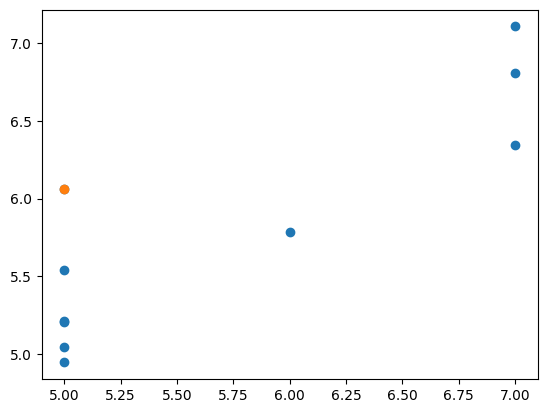

,Percentual de docentes permanentes (DP) com programa de computador com discentes ou egressos,% de DPs com 2 a 5 turmas ministradas,Percentual de docentes permanentes (DP) com serviços técnicos com discentes ou egressos
ppgeps 5,11.188811,54.079254,0.000000
ufscar 5,1.388889,6.150794,11.111111
unesp 5,3.030303,8.459596,4.419192
unifei 5,4.945055,35.836386,0.000000
utfpr 5,1.754386,56.140351,3.508772
usp 5,0.000000,10.416667,0.000000
ufsc 6,0.000000,52.539683,0.000000
ufpe 7,36.887255,77.573529,0.000000
pucrio 7,22.352941,44.967320,75.424837
ufrgs 7,10.171569,40.808824,32.720588


In [ ]:
features_to_use = mdl.coef_ == 0
mdl = Lasso().fit(X_ppg[1:,features_to_use], y_ppg[1:])
y_ppg_pred = mdl.predict(X_ppg[:,features_to_use])

plt.scatter(y_ppg, y_ppg_pred)
plt.scatter(y_ppg[0], y_ppg_pred[0])
plt.show()

positive_lasso_2nd_features = np.array(features)[features_to_use][mdl.coef_ > 0.0]
negative_lasso_2nd_features = np.array(features)[features_to_use][mdl.coef_ < 0.0]
positive_lasso_2nd_features, negative_lasso_2nd_features

df = pd.DataFrame(
    X_ppg[:,features_to_use][:,mdl.coef_ > 0.0],
    columns=positive_lasso_2nd_features,
    index=[item for item in programas])
df

In [ ]:
df = pd.DataFrame(
    X_ppg[:,features_to_use][:,mdl.coef_ < 0.0],
    columns=negative_lasso_2nd_features,
    index=[item for item in programas])
df

,Percentual de docentes permanentes (DP) com capítulo de livro publicado com discentes ou egressos,% DP com orientações concluídas de qualquer nível,% DP com 2 a 10 orientações de qualquer nível,Percentual de docentes permanentes (DP) com apresentação de trabalho com discentes ou egressos
ppgeps 5,57.575758,76.456876,32.167832,0.000000
ufscar 5,13.492063,68.253968,74.801587,3.174603
unesp 5,15.656566,31.439394,75.126263,21.338384
unifei 5,9.230769,76.117216,97.777778,7.167277
utfpr 5,33.333333,85.964912,66.666667,10.526316
usp 5,20.465686,52.818627,85.661765,8.333333
ufsc 6,0.000000,54.285714,78.730159,3.333333
ufpe 7,24.632353,75.490196,54.779412,0.000000
pucrio 7,17.908497,70.588235,73.464052,12.026144
ufrgs 7,16.299020,73.406863,65.441176,0.000000


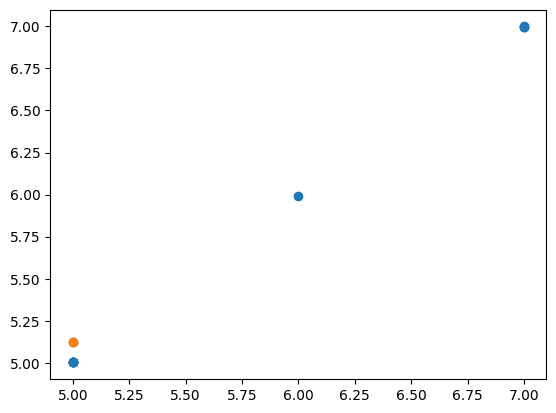

,Média ponderada de artigos (IndArtigo) por DPs e por ano,Média de artigos A2+ dos DPs por ano,Média de artigos A2+ únicos no PPG por ano (e por DPs),Média de capítulos de livros com discentes ou egressos dos DPs por ano: Indicador considerando apenas egressos identificados pelo sistema,Média de capítulos de livros únicos com discentes ou egressos no PPG por ano (e por DPs): Indicador considerando apenas egressos identificados pelo sistema,Percentual de docentes permanentes (DP) com artigo A2+ (A1 e A2) com discentes ou egressos: Indicador considerando apenas discentes,Percentual de discentes com programas de computador,% de DPs com turmas ministradas,Média de serviços técnicos com discentes ou egressos dos DPs por ano,Média de serviços técnicos com discentes ou egressos dos DPs por ano: Indicador considerando apenas discentes,Média de serviços técnicos com discentes ou egressos dos DPs por ano: Indicador considerando apenas egressos registrados na Sucupira,Média de serviços técnicos únicos com discentes ou egressos no PPG por ano (e por DPs): Indicador considerando apenas egressos registrados na Sucupira,Média de desenvolvimento de produtos com discentes ou egressos dos DPs por ano: Indicador considerando apenas egressos registrados na Sucupira,Média de desenvolvimento de produtos únicos com discentes ou egressos no PPG por ano (e por DPs): Indicador considerando apenas egressos registrados na Sucupira,Percentual de docentes permanentes (DP) com serviços técnicos com discentes ou egressos: Indicador considerando apenas discentes,Percentual de docentes permanentes (DP) com desenvolvimento de produto com discentes ou egressos: Indicador considerando apenas egressos registrados na Sucupira
ppgeps 5,3.049534,2.976690,2.249417,0.000000,0.000000,66.200466,0.933472,91.841492,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ufscar 5,3.089038,3.535714,2.503968,0.000000,0.000000,46.031746,0.198413,65.277778,0.111111,0.000000,0.111111,0.027778,0.000000,0.000000,0.000000,0.000000
unesp 5,2.029198,2.098485,1.513889,0.000000,0.000000,38.636364,0.490196,75.631313,0.088384,0.058081,0.060606,0.030303,0.000000,0.000000,4.419192,0.000000
unifei 5,2.092094,2.242735,1.567277,0.000000,0.000000,44.029304,0.000000,83.284493,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
utfpr 5,3.614035,3.140351,2.333333,0.000000,0.000000,61.403509,0.161031,94.736842,0.035088,0.017544,0.035088,0.035088,0.000000,0.000000,1.754386,0.000000
usp 5,2.512868,2.355392,2.071078,0.020833,0.020833,46.691176,0.000000,71.691176,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ufsc 6,3.902679,3.419048,2.877778,0.000000,0.000000,49.206349,0.000000,91.904762,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ufpe 7,2.892157,3.115196,2.356618,0.000000,0.000000,69.117647,2.683638,95.955882,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
pucrio 7,2.674510,3.073203,2.311111,0.019608,0.019608,61.437908,4.155942,93.594771,2.797386,2.307190,0.962092,0.640523,0.000000,0.000000,73.464052,0.000000
ufrgs 7,3.928156,4.867647,3.469363,0.039216,0.039216,69.362745,1.729135,81.740196,0.950980,0.721814,0.534314,0.267157,0.041667,0.020833,24.387255,4.166667


In [ ]:
pipeline = Pipeline([('scale', StandardScaler()), ('reg', Ridge())])
mdl = pipeline.fit(X_ppg[1:], y_ppg[1:])
y_ppg_pred = mdl.predict(X_ppg)

plt.scatter(y_ppg, y_ppg_pred)
plt.scatter(y_ppg[0], y_ppg_pred[0])
plt.show()

positive_ridge_features = np.array(features)[(mdl['reg'].coef_ > 0.018)]
negative_ridge_features = np.array(features)[(mdl['reg'].coef_ < -0.018)]
positive_ridge_features, negative_ridge_features

df = pd.DataFrame(
    X_ppg[:,mdl['reg'].coef_ > 0.018],
    columns=positive_ridge_features,
    index=[item for item in programas])
df

In [ ]:
df = pd.DataFrame(
    X_ppg[:,mdl['reg'].coef_ < -0.018],
    columns=negative_ridge_features,
    index= [item for item in programas])
df

,Média de livros únicos no PPG por ano (e por DPs),Média de carga horária dos DPs em turmas ministradas
ppgeps 5,0.321678,59.199301
ufscar 5,0.089286,176.974359
unesp 5,0.125000,133.214286
unifei 5,0.190720,71.925408
utfpr 5,0.192982,84.780702
usp 5,0.061275,135.000000
ufsc 6,0.050000,63.377193
ufpe 7,0.122549,98.375000
pucrio 7,0.041830,61.430995
ufrgs 7,0.100490,65.423077


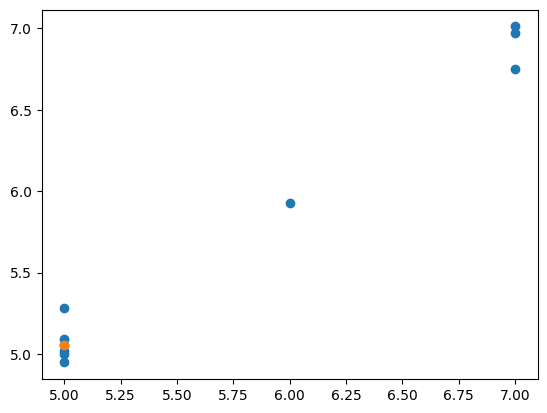

(array(['Média de artigos A2+ dos DPs por ano',
        'Média de artigos A2+ únicos no PPG por ano (e por DPs)',
        'Percentual de docentes permanentes (DP) com artigo A2+ (A1 e A2) com discentes ou egressos: Indicador considerando apenas discentes',
        'Percentual de discentes com programas de computador',
        '% de DPs com turmas ministradas',
        'Média de desenvolvimento de produtos com discentes ou egressos dos DPs por ano: Indicador considerando apenas egressos registrados na Sucupira',
        'Média de desenvolvimento de produtos únicos com discentes ou egressos no PPG por ano (e por DPs): Indicador considerando apenas egressos registrados na Sucupira',
        'Percentual de docentes permanentes (DP) com desenvolvimento de produto com discentes ou egressos: Indicador considerando apenas egressos registrados na Sucupira'],
       dtype='<U175'),
 array(['Média ponderada de artigos (IndArtigo) por DPs e por ano',
        'Média de livros únicos no PPG por ano 

In [ ]:
features_to_use = (mdl['reg'].coef_ > 0.018) | (mdl['reg'].coef_ < -0.018)
pipeline = Pipeline([('scale', StandardScaler()), ('reg', Ridge())])
mdl = pipeline.fit(X_ppg[1:,features_to_use], y_ppg[1:])
y_ppg_pred = mdl.predict(X_ppg[:,features_to_use])

plt.scatter(y_ppg, y_ppg_pred)
plt.scatter(y_ppg[0], y_ppg_pred[0])
plt.show()

positive_ridge_2nd_features = np.array(features)[features_to_use][(mdl['reg'].coef_ > 0.018)]
negative_ridge_2nd_features = np.array(features)[features_to_use][(mdl['reg'].coef_ < -0.018)]
positive_ridge_2nd_features, negative_ridge_2nd_features

# Regressão Linear Simples

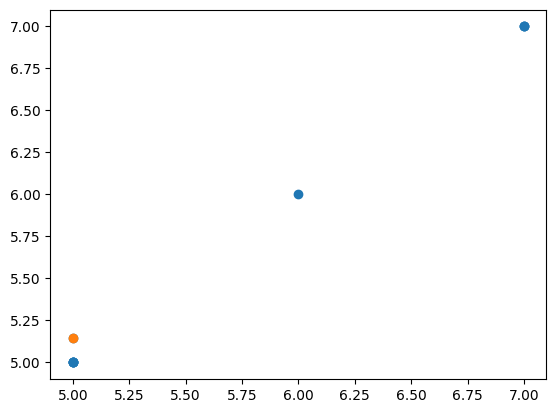

In [ ]:
mdl = LinearRegression().fit(X_ppg[1:], y_ppg[1:])
y_ppg_pred = mdl.predict(X_ppg)

plt.scatter(y_ppg, y_ppg_pred)
plt.scatter(y_ppg[0], y_ppg_pred[0])
plt.show()

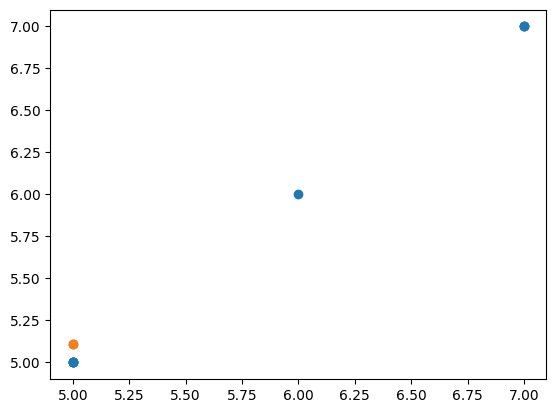

,Média ponderada de artigos (IndArtigo) por DPs e por ano,Média de artigos A2+ dos DPs por ano,Média de artigos A2+ únicos no PPG por ano (e por DPs),Média de capítulos de livros com discentes ou egressos dos DPs por ano: Indicador considerando apenas egressos identificados pelo sistema,Média de capítulos de livros únicos com discentes ou egressos no PPG por ano (e por DPs): Indicador considerando apenas egressos identificados pelo sistema,Percentual de docentes permanentes (DP) com artigo A2+ (A1 e A2) com discentes ou egressos: Indicador considerando apenas discentes,Percentual de discentes com programas de computador,% de DPs com turmas ministradas,Média de serviços técnicos com discentes ou egressos dos DPs por ano,Média de serviços técnicos com discentes ou egressos dos DPs por ano: Indicador considerando apenas discentes,Média de serviços técnicos com discentes ou egressos dos DPs por ano: Indicador considerando apenas egressos registrados na Sucupira,Média de serviços técnicos únicos com discentes ou egressos no PPG por ano (e por DPs): Indicador considerando apenas egressos registrados na Sucupira,Média de desenvolvimento de produtos com discentes ou egressos dos DPs por ano: Indicador considerando apenas egressos registrados na Sucupira,Média de desenvolvimento de produtos únicos com discentes ou egressos no PPG por ano (e por DPs): Indicador considerando apenas egressos registrados na Sucupira,Percentual de docentes permanentes (DP) com serviços técnicos com discentes ou egressos: Indicador considerando apenas discentes,Percentual de docentes permanentes (DP) com desenvolvimento de produto com discentes ou egressos: Indicador considerando apenas egressos registrados na Sucupira
ppgeps 5,3.049534,2.976690,2.249417,0.000000,0.000000,66.200466,0.933472,91.841492,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ufscar 5,3.089038,3.535714,2.503968,0.000000,0.000000,46.031746,0.198413,65.277778,0.111111,0.000000,0.111111,0.027778,0.000000,0.000000,0.000000,0.000000
unesp 5,2.029198,2.098485,1.513889,0.000000,0.000000,38.636364,0.490196,75.631313,0.088384,0.058081,0.060606,0.030303,0.000000,0.000000,4.419192,0.000000
unifei 5,2.092094,2.242735,1.567277,0.000000,0.000000,44.029304,0.000000,83.284493,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
utfpr 5,3.614035,3.140351,2.333333,0.000000,0.000000,61.403509,0.161031,94.736842,0.035088,0.017544,0.035088,0.035088,0.000000,0.000000,1.754386,0.000000
usp 5,2.512868,2.355392,2.071078,0.020833,0.020833,46.691176,0.000000,71.691176,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ufsc 6,3.902679,3.419048,2.877778,0.000000,0.000000,49.206349,0.000000,91.904762,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ufpe 7,2.892157,3.115196,2.356618,0.000000,0.000000,69.117647,2.683638,95.955882,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
pucrio 7,2.674510,3.073203,2.311111,0.019608,0.019608,61.437908,4.155942,93.594771,2.797386,2.307190,0.962092,0.640523,0.000000,0.000000,73.464052,0.000000
ufrgs 7,3.928156,4.867647,3.469363,0.039216,0.039216,69.362745,1.729135,81.740196,0.950980,0.721814,0.534314,0.267157,0.041667,0.020833,24.387255,4.166667


In [ ]:
pipeline = Pipeline([('scale', StandardScaler()), ('reg', LinearRegression())])
mdl = pipeline.fit(X_ppg[1:], y_ppg[1:])
y_ppg_pred = mdl.predict(X_ppg)

plt.scatter(y_ppg, y_ppg_pred)
plt.scatter(y_ppg[0], y_ppg_pred[0])
plt.show()

positive_lr_features = np.array(features)[(mdl['reg'].coef_ > 0.018)]
negative_lr_features = np.array(features)[(mdl['reg'].coef_ < -0.018)]
positive_lr_features, negative_lr_features

df = pd.DataFrame(
    X_ppg[:,mdl['reg'].coef_ > 0.018],
    columns=positive_lr_features,
    index=[item for item in programas])
df

In [ ]:
df = pd.DataFrame(
    X_ppg[:,mdl['reg'].coef_ < -0.018],
    columns=negative_lr_features,
    index=[item for item in programas])
df

,Média de artigos em periódicos com discentes ou egressos dos DPs por ano: Indicador considerando apenas egressos registrados na Sucupira,Média de livros únicos no PPG por ano (e por DPs),Média de carga horária dos DPs em turmas ministradas
ppgeps 5,2.419580,0.321678,59.199301
ufscar 5,2.962302,0.089286,176.974359
unesp 5,1.121212,0.125000,133.214286
unifei 5,2.537363,0.190720,71.925408
utfpr 5,3.350877,0.192982,84.780702
usp 5,1.574755,0.061275,135.000000
ufsc 6,1.134921,0.050000,63.377193
ufpe 7,1.735294,0.122549,98.375000
pucrio 7,1.364706,0.041830,61.430995
ufrgs 7,2.590686,0.100490,65.423077


# PCA

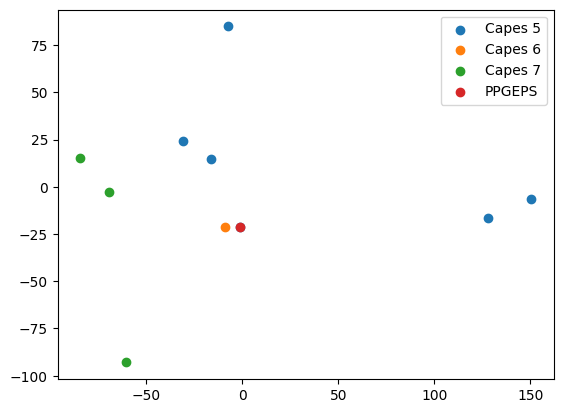

In [ ]:
# mdl = Pipeline([('scale', StandardScaler()), ('reg', PCA(n_components=2))]).fit(X_ppg[1:])
mdl = PCA(n_components=2).fit(X_ppg[1:])
x_ppg_2d = mdl.transform(X_ppg)
for label in np.unique(y_ppg):
    plt.scatter(x_ppg_2d[y_ppg == label,0], x_ppg_2d[y_ppg == label,1])
plt.scatter(x_ppg_2d[0,0], x_ppg_2d[0,1])
plt.legend(['Capes 5', 'Capes 6', 'Capes 7', 'PPGEPS'])
plt.show()

In [ ]:
all_positive_features = set(positive_lr_features.tolist() + positive_lasso_features.tolist() + positive_lasso_2nd_features.tolist() + positive_ridge_features.tolist() + positive_ridge_2nd_features.tolist())
all_negative_features = set(negative_lr_features.tolist() + negative_lasso_features.tolist() + negative_lasso_2nd_features.tolist() + negative_ridge_features.tolist() + negative_ridge_2nd_features.tolist())

In [ ]:
selected_features_bool = np.array([feat in all_positive_features for feat in features])
selected_features = np.array(features)[selected_features_bool]

all_X = X_ppg[:,selected_features_bool]
plot_df = pd.DataFrame(all_X, columns=selected_features.tolist())
plot_df.index = [item for item in programas]

plot_df

,Média ponderada de artigos (IndArtigo) por DPs e por ano,Média de artigos A2+ dos DPs por ano,Média de artigos A2+ únicos no PPG por ano (e por DPs),Média de capítulos de livros com discentes ou egressos dos DPs por ano: Indicador considerando apenas egressos identificados pelo sistema,Média de capítulos de livros únicos com discentes ou egressos no PPG por ano (e por DPs): Indicador considerando apenas egressos identificados pelo sistema,Percentual de docentes permanentes (DP) com artigo A2+ (A1 e A2) com discentes ou egressos: Indicador considerando apenas discentes,Percentual de docentes permanentes (DP) com programa de computador com discentes ou egressos,Percentual de docentes permanentes (DP) com produção com discentes ou egressos: Indicador considerando apenas egressos identificados pelo sistema,Percentual de discentes com programas de computador,% de DPs com turmas ministradas,% de DPs com 2 a 5 turmas ministradas,Média de serviços técnicos com discentes ou egressos dos DPs por ano,Média de serviços técnicos com discentes ou egressos dos DPs por ano: Indicador considerando apenas discentes,Média de serviços técnicos com discentes ou egressos dos DPs por ano: Indicador considerando apenas egressos registrados na Sucupira,Média de serviços técnicos únicos com discentes ou egressos no PPG por ano (e por DPs): Indicador considerando apenas egressos registrados na Sucupira,Média de desenvolvimento de produtos com discentes ou egressos dos DPs por ano: Indicador considerando apenas egressos registrados na Sucupira,Média de desenvolvimento de produtos únicos com discentes ou egressos no PPG por ano (e por DPs): Indicador considerando apenas egressos registrados na Sucupira,Percentual de docentes permanentes (DP) com serviços técnicos com discentes ou egressos,Percentual de docentes permanentes (DP) com serviços técnicos com discentes ou egressos: Indicador considerando apenas discentes,Percentual de docentes permanentes (DP) com desenvolvimento de produto com discentes ou egressos: Indicador considerando apenas egressos registrados na Sucupira
ppgeps 5,3.049534,2.976690,2.249417,0.000000,0.000000,66.200466,11.188811,0.000000,0.933472,91.841492,54.079254,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ufscar 5,3.089038,3.535714,2.503968,0.000000,0.000000,46.031746,1.388889,2.976190,0.198413,65.277778,6.150794,0.111111,0.000000,0.111111,0.027778,0.000000,0.000000,11.111111,0.000000,0.000000
unesp 5,2.029198,2.098485,1.513889,0.000000,0.000000,38.636364,3.030303,1.515152,0.490196,75.631313,8.459596,0.088384,0.058081,0.060606,0.030303,0.000000,0.000000,4.419192,4.419192,0.000000
unifei 5,2.092094,2.242735,1.567277,0.000000,0.000000,44.029304,4.945055,2.564103,0.000000,83.284493,35.836386,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
utfpr 5,3.614035,3.140351,2.333333,0.000000,0.000000,61.403509,1.754386,5.263158,0.161031,94.736842,56.140351,0.035088,0.017544,0.035088,0.035088,0.000000,0.000000,3.508772,1.754386,0.000000
usp 5,2.512868,2.355392,2.071078,0.020833,0.020833,46.691176,0.000000,8.333333,0.000000,71.691176,10.416667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ufsc 6,3.902679,3.419048,2.877778,0.000000,0.000000,49.206349,0.000000,3.333333,0.000000,91.904762,52.539683,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ufpe 7,2.892157,3.115196,2.356618,0.000000,0.000000,69.117647,36.887255,47.058824,2.683638,95.955882,77.573529,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
pucrio 7,2.674510,3.073203,2.311111,0.019608,0.019608,61.437908,22.352941,4.183007,4.155942,93.594771,44.967320,2.797386,2.307190,0.962092,0.640523,0.000000,0.000000,75.424837,73.464052,0.000000
ufrgs 7,3.928156,4.867647,3.469363,0.039216,0.039216,69.362745,10.171569,6.004902,1.729135,81.740196,40.808824,0.950980,0.721814,0.534314,0.267157,0.041667,0.020833,32.720588,24.387255,4.166667


In [ ]:
selected_features_bool = np.array([feat in all_negative_features for feat in features])
selected_features = np.array(features)[selected_features_bool]

all_X = X_ppg[:,selected_features_bool]
plot_df = pd.DataFrame(all_X, columns=selected_features.tolist())
plot_df.index = [item for item in programas]

plot_df

,Média ponderada de artigos (IndArtigo) por DPs e por ano,Média de artigos em periódicos com discentes ou egressos dos DPs por ano: Indicador considerando apenas egressos registrados na Sucupira,Média de livros únicos no PPG por ano (e por DPs),Média de capítulos de livros com discentes ou egressos dos DPs por ano: Indicador considerando apenas egressos identificados pelo sistema,Média de capítulos de livros únicos com discentes ou egressos no PPG por ano (e por DPs): Indicador considerando apenas egressos identificados pelo sistema,Percentual de docentes permanentes (DP) com capítulo de livro publicado com discentes ou egressos,Percentual de docentes permanentes (DP) com trabalho publicado em anais de eventos com discentes ou egressos: Indicador considerando apenas egressos registrados na Sucupira,% DP com orientações concluídas de qualquer nível,% DP com 2 a 10 orientações de qualquer nível,% DP com orientações de doutorado em andamento,Média de carga horária dos DPs em turmas ministradas,Média de carga horária de outros docentes em turmas ministradas,Média de serviços técnicos com discentes ou egressos dos DPs por ano,Média de serviços técnicos com discentes ou egressos dos DPs por ano: Indicador considerando apenas egressos registrados na Sucupira,Média de serviços técnicos únicos com discentes ou egressos no PPG por ano (e por DPs): Indicador considerando apenas egressos registrados na Sucupira,Percentual de docentes permanentes (DP) com apresentação de trabalho com discentes ou egressos,Percentual de docentes permanentes (DP) com serviços técnicos com discentes ou egressos: Indicador considerando apenas discentes
ppgeps 5,3.049534,2.419580,0.321678,0.000000,0.000000,57.575758,59.673660,76.456876,32.167832,86.713287,59.199301,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ufscar 5,3.089038,2.962302,0.089286,0.000000,0.000000,13.492063,42.261905,68.253968,74.801587,91.269841,176.974359,0.000000,0.111111,0.111111,0.027778,3.174603,0.000000
unesp 5,2.029198,1.121212,0.125000,0.000000,0.000000,15.656566,18.686869,31.439394,75.126263,72.727273,133.214286,120.000000,0.088384,0.060606,0.030303,21.338384,4.419192
unifei 5,2.092094,2.537363,0.190720,0.000000,0.000000,9.230769,65.885226,76.117216,97.777778,95.396825,71.925408,56.166667,0.000000,0.000000,0.000000,7.167277,0.000000
utfpr 5,3.614035,3.350877,0.192982,0.000000,0.000000,33.333333,47.368421,85.964912,66.666667,100.000000,84.780702,45.000000,0.035088,0.035088,0.035088,10.526316,1.754386
usp 5,2.512868,1.574755,0.061275,0.020833,0.020833,20.465686,16.544118,52.818627,85.661765,77.450980,135.000000,140.000000,0.000000,0.000000,0.000000,8.333333,0.000000
ufsc 6,3.902679,1.134921,0.050000,0.000000,0.000000,0.000000,36.269841,54.285714,78.730159,96.746032,63.377193,0.000000,0.000000,0.000000,0.000000,3.333333,0.000000
ufpe 7,2.892157,1.735294,0.122549,0.000000,0.000000,24.632353,61.397059,75.490196,54.779412,83.578431,98.375000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
pucrio 7,2.674510,1.364706,0.041830,0.019608,0.019608,17.908497,56.993464,70.588235,73.464052,63.398693,61.430995,0.000000,2.797386,0.962092,0.640523,12.026144,73.464052
ufrgs 7,3.928156,2.590686,0.100490,0.039216,0.039216,16.299020,41.053922,73.406863,65.441176,79.656863,65.423077,0.000000,0.950980,0.534314,0.267157,0.000000,24.387255
